<a href="https://colab.research.google.com/github/Grazipolachini/CursoDataScience/blob/main/ModeloClassificacaoCancerDeMama_Polachini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## O Dataset utilizado nesse treinamento, contém informações referentes a câncer de mama. O Objetivo do trabalho, é prever com base nos dados de dimensão, textura do câncer, por exemplo, se o tumor é maligno ou benigno.

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"


In [32]:
# Inclui nome para as colunas no dataset
colunas = [
    "ID", "Diagnostico",
    "Raio_Medio", "Textura_Media", "Perimetro_Medio", "Area_Media", "Suavidade_Media",
    "Compacidade_Media", "Concavidade_Media", "Pontos_Concavos_Medios", "Simetria_Media", "Dimensao_Fractal_Media",
    "Raio_SE", "Textura_SE", "Perimetro_SE", "Area_SE", "Suavidade_SE",
    "Compacidade_SE", "Concavidade_SE", "Pontos_Concavos_SE", "Simetria_SE", "Dimensao_Fractal_SE",
    "Raio_Pior", "Textura_Pior", "Perimetro_Pior", "Area_Pior", "Suavidade_Pior",
    "Compacidade_Pior", "Concavidade_Pior", "Pontos_Concavos_Piores", "Simetria_Pior", "Dimensao_Fractal_Pior"
]


In [35]:
df = pd.read_csv(url, header=None, names=colunas)
df.head()

,ID,Diagnostico,Raio_Medio,Textura_Media,Perimetro_Medio,Area_Media,Suavidade_Media,Compacidade_Media,Concavidade_Media,Pontos_Concavos_Medios,...,Raio_Pior,Textura_Pior,Perimetro_Pior,Area_Pior,Suavidade_Pior,Compacidade_Pior,Concavidade_Pior,Pontos_Concavos_Piores,Simetria_Pior,Dimensao_Fractal_Pior
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
#validações

print(df.shape[0])
print(df.isnull().sum())
print(df['Diagnostico'].value_counts())

569
ID                        0
Diagnostico               0
Raio_Medio                0
Textura_Media             0
Perimetro_Medio           0
Area_Media                0
Suavidade_Media           0
Compacidade_Media         0
Concavidade_Media         0
Pontos_Concavos_Medios    0
Simetria_Media            0
Dimensao_Fractal_Media    0
Raio_SE                   0
Textura_SE                0
Perimetro_SE              0
Area_SE                   0
Suavidade_SE              0
Compacidade_SE            0
Concavidade_SE            0
Pontos_Concavos_SE        0
Simetria_SE               0
Dimensao_Fractal_SE       0
Raio_Pior                 0
Textura_Pior              0
Perimetro_Pior            0
Area_Pior                 0
Suavidade_Pior            0
Compacidade_Pior          0
Concavidade_Pior          0
Pontos_Concavos_Piores    0
Simetria_Pior             0
Dimensao_Fractal_Pior     0
dtype: int64
Diagnostico
B    357
M    212
Name: count, dtype: int64


In [37]:
#Remove coluna ID
df = df.drop("ID", axis=1)

#Transforma valores Maligno e Benigno em binário
df['Diagnostico'] = df['Diagnostico'].map({'M': 1, 'B': 0})

In [38]:
#Separa varaveis
X = df.drop("Diagnostico", axis=1)
y = df["Diagnostico"]

In [77]:
#Divide variáveis em teste e treino
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)


In [123]:
#treinamento
modelo = RandomForestClassifier(
    n_estimators=2000,
    #max_depth=10,
    #min_samples_split=5,
    #min_samples_leaf=2,
    class_weight='balanced',
    random_state=42)
modelo.fit(X_treino, y_treino)

#previsao
y_pred = modelo.predict(X_teste)

In [124]:
print("Acurácia:", accuracy_score(y_teste, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred, target_names=["Benigno", "Maligno"]))


Acurácia: 0.9736842105263158

Matriz de Confusão:
[[72  0]
 [ 3 39]]

Relatório de Classificação:
              precision    recall  f1-score   support

     Benigno       0.96      1.00      0.98        72
     Maligno       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [122]:
#cross validation
scores = cross_val_score(modelo, X, y, cv=5)
print("Acurácia média:", scores.mean())

Acurácia média: 0.9631113181183046


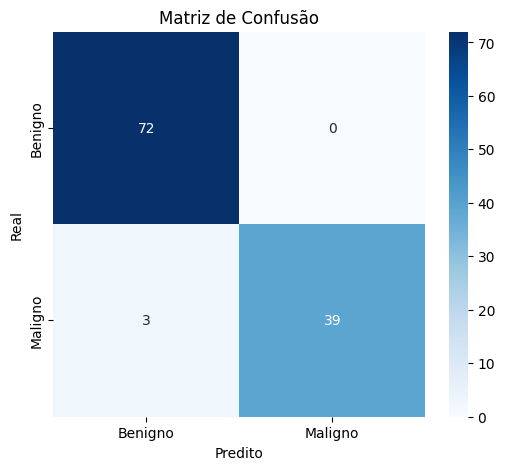

In [108]:
# Matriz de confusão
cm = confusion_matrix(y_teste, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

/tmp/ipython-input-43-2592004637.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias.values[:10], y=importancias.index[:10], palette="mako")


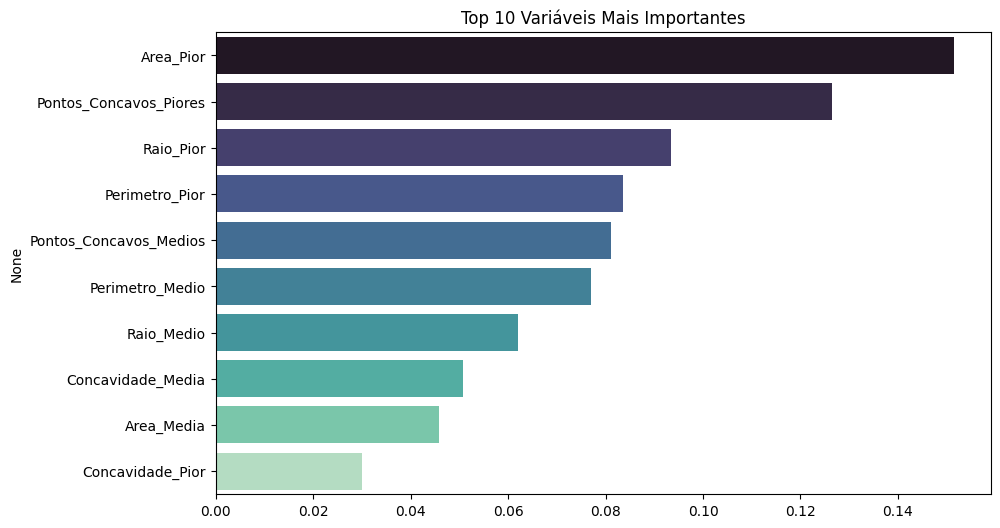

In [43]:
# Classificação de variáveis mais importantes
importancias = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importancias.values[:10], y=importancias.index[:10], palette="mako")
plt.title("Top 10 Variáveis Mais Importantes")
plt.show()

##Considerações Finais

Neste estudo, foi utilizado o algoritmo Random Forest para a classificação de tumores malignos e benignos com base em atributos extraídos de imagens de exames de mama. O modelo foi treinado e testado com o conjunto de dados Breast Cancer Wisconsin (Diagnostic), contendo 569 amostras e 30 características numéricas.

Após a preparação dos dados, incluindo o tratamento da variável alvo, padronização das variáveis preditoras e a divisão em treino (80%) e teste (20%), o modelo foi treinado com os parâmetros padrão do RandomForestClassifier, considerando pequenos ajustes como class weight para balancear o volume entre maligno e benigno e o numero de folhas.

Com isso, tivemos um retorno de acurácia de aproximadamente ˜98%
A matriz de confusão apresentou baixa taxa de falsos positivos e negativos e o cross validation indicou boa estabilidade com variação pequena entre as dobras.

Podemos concluir que o randomforest dentro desse modelo, demonstrou uma boa acurácia e robustez, mantendo a consistência mesmo na validação cruzada. Foi eficaz nesse modelo por lidar bem com variáveis correlacionadas e por ser menos suscetível a overfiting.